<a href="https://colab.research.google.com/github/HJ-Kurt-Su/model/blob/main/machine_learning_classification_train_Y221103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare: Install Package

In [1]:
#@markdown **Import Required Package**


import datetime

import pandas as pd
# from scipy import stats
import numpy as np
# import itertools
import datetime
# import plotly.express as px
# import plotly.graph_objects as go
# from IPython.display import display,HTML
from ipywidgets import widgets
import os


from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay




# from sklearn.tree import export_graphviz

# #@markdown **Mount Google Drive** & import package

# #@markdown !!Need Google Acount **Authority**
# mount_g_drive = False #@param {type:"boolean"}
# google_folder = "0710 Colab_Mount_x02" #@param{type: 'string'}

# if mount_g_drive == True:
#   from google.colab import drive
#   drive.mount('/content/drive')

#   folder_path = "drive/MyDrive/" + google_folder

#   if not os.path.isdir(folder_path):
#       os.mkdir(folder_path)


print("Import Module Done")
print(datetime.datetime.now())

Import Module Done
2022-11-12 02:12:59.368986


In [2]:
#@markdown **Select & Upload File**

from google.colab import files
uploaded = files.upload()

print("File Upload Done")
print(datetime.datetime.now())
# # files.download("finalized_model_knn.sav")

Saving Regression of type1 retention_clf.csv to Regression of type1 retention_clf.csv
File Upload Done
2022-11-12 02:13:16.928131


In [3]:
#@markdown ####**Input Settings:**

data_name = "Regression of type1 retention_clf.csv" #@param{type: 'string'}
# result_name = "hard_mount_df_Regression_20220708.csv" #@param{type: 'string'}
# data_by_g_drive = False #@param {type:"boolean"}
encoding = "utf-8" #@param{type: 'string'}


# steps =  250#@param [25,50,100,150,250,500,1000]{type: 'raw', allow-input: false}
# width_height = [512, 256]#@param{type: 'raw'}
# clip_guidance_scale = 5000 #@param{type: 'number'}
# tv_scale =  0#@param{type: 'number'}
# range_scale =   150#@param{type: 'number'}
# sat_scale =   0#@param{type: 'number'}
# cutn_batches = 4  #@param{type: 'number'}
# skip_augs = False#@param{type: 'boolean'}

# encoding = "utf-8"

# if data_by_g_drive == True:
#   load_path = folder_path + "/" + data_name
#   try:
#     df = pd.read_csv(load_path, encoding=encoding)
#   except FileNotFoundError:
#     print("No this file in Google Drive, Please upload!")
# else:
#   try:
#     df = pd.read_csv(data_name, encoding=encoding)
#   except FileNotFoundError:
#     print("No this file in Colab, Please upload!")

try:
  df = pd.read_csv(data_name, encoding=encoding)
except FileNotFoundError:
  print("No this file in Colab, Please upload!")


print(datetime.datetime.now())
df.head()
# print(df.columns)

2022-11-12 02:13:18.553606


,mass,spring,L8,L7,L4,L5,L9,L10,Result,ResultCLF,ResultLN
0,0.000187,64.993514,3.770880,14.240362,2.932061,3.951202,13.220880,0.048354,0.364761,0,-1.008512
1,0.000523,95.475882,4.265280,12.232493,2.887516,4.467207,13.715280,0.060281,0.546805,0,-0.603663
2,0.000317,79.472638,5.550720,10.342994,3.506761,4.191498,15.000720,0.139334,0.598321,0,-0.513628
3,0.000432,81.758816,7.132800,10.618453,3.181483,5.053310,16.582800,0.294083,0.705885,0,-0.348303
4,0.000097,96.542764,8.299584,11.227812,4.057285,3.972161,17.749584,0.264115,0.706400,0,-0.347574


In [4]:
#@markdown ####Choose Y column

dropdown_list = list(df.columns)
# dropdown_list.append("None")

# dropdown_x_var = widgets.Dropdown(options =dropdown_list)
dropdown_y_var = widgets.Dropdown(options =dropdown_list)
# dropdown_cate = widgets.Dropdown(options =dropdown_list)

print("Select Y Variable")
display(dropdown_y_var)
print("--------------------")

Select Y Variable


Dropdown(options=('mass', 'spring', 'L8', 'L7', 'L4', 'L5', 'L9', 'L10', 'Result', 'ResultCLF', 'ResultLN'), v…

--------------------


In [5]:

#@markdown #####**focus**: column name for pair plot. set None for all column
#@markdown Ex: None or ["A", "B", "C"]. A, B, C is factor name
x_variable = ["mass", "spring", "L8", "L7", "L4", "L5", "L9", "L10"] #@param{type: 'raw'}
x_var_list = list(set(x_variable))
print(x_var_list)
# x_variable
df_x = df[x_var_list]
df_x_mod = df_x.copy()
df_x.head()

['L8', 'L5', 'mass', 'L7', 'L4', 'L10', 'L9', 'spring']


,L8,L5,mass,L7,L4,L10,L9,spring
0,3.770880,3.951202,0.000187,14.240362,2.932061,0.048354,13.220880,64.993514
1,4.265280,4.467207,0.000523,12.232493,2.887516,0.060281,13.715280,95.475882
2,5.550720,4.191498,0.000317,10.342994,3.506761,0.139334,15.000720,79.472638
3,7.132800,5.053310,0.000432,10.618453,3.181483,0.294083,16.582800,81.758816
4,8.299584,3.972161,0.000097,11.227812,4.057285,0.264115,17.749584,96.542764


In [ ]:
#@markdown ####**Data Cell Rename: Multiple**

#@markdown ####**Note:** List Q'ty must to mapping

change_col_name = ["Tray_Sled", "Glue"] #@param{type: 'raw'}
change_item = ["Tray", "Y"]  #@param{type: 'raw'}
new_name = ["0", "1"]  #@param{type: 'raw'}

for i in range(len(change_col_name)):

  df_x_mod.loc[df_x_mod[change_col_name[i]] == change_item[i], change_col_name[i]] = new_name[i]
print(datetime.datetime.now())
print("Done!!")
df_x_mod.head()

2022-11-06 03:25:13.071003
Done!!


,Glue,ModuleWeight,Tray_Sled,GPInQ,Screw,TpinQ,SideWall_T,Module_T
0,0,4.7,1,0.0612,0,0.0,1.1378,0.8
1,1,4.7,1,0.0612,0,0.0,1.1378,0.8
2,0,5.0,1,0.0612,0,0.0,1.1378,0.8
3,1,5.0,1,0.0612,0,0.0,1.1378,0.8
4,1,5.0,1,0.0612,0,0.0,1.1378,0.8


In [40]:
#@markdown ###**Train Model:**

model_selection = 'XGBClassifier' #@param ["Support Vector Classifier", "KNeighborsClassifier", "XGBClassifier", "GaussianProcessClassifier", "RandomForestClassifier", "DecisionTreeClassifier"]
x_feature_scaling = True #@param {type:"boolean"}
y_feature_scaling = False #@param {type:"boolean"}
#@markdown #####SVM Parameter
kernel_selection = 'rbf' #@param ["linear", "poly", "rbf"]

#@markdown #####KNeighborsRegressor Parameter
neighbors = 5 #@param {type:"integer"}

#@markdown #####Decision Tree/Random Forest Parameter

# #@markdown ####**Train Decision Tree Model:**

max_tree_depth = 3 #@param {type:"slider", min:1, max:10, step:1}


# # print(dropdown_y_var)
y = df[dropdown_y_var.value].copy()


if x_feature_scaling == True:
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  df_x_mod_trans = sc.fit_transform(df_x_mod)
else:
  df_x_mod_trans = df_x_mod.copy()

if y_feature_scaling == True:
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  y_trans = sc.fit_transform(y)
else:
  y_trans = y.copy()



if model_selection == 'Support Vector Classifier':
  from sklearn.svm import SVC
  clf_model = SVC(kernel = kernel_selection, gamma=2)
  # clf_model.fit(df_x_mod_trans, y_trans)

elif model_selection == "KNeighborsClassifier":
  from sklearn.neighbors import KNeighborsClassifier
  clf_model = KNeighborsClassifier(n_neighbors = neighbors, metric = 'minkowski', p = 3, leaf_size=50)

if model_selection == 'XGBClassifier':
  from xgboost import XGBClassifier
  clf_model = XGBClassifier()
  clf_model.fit(df_x_mod_trans, y_trans)


elif model_selection == 'GaussianProcessClassifier':
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.gaussian_process.kernels import RBF
  kernel = 1.0 * RBF(1.0)
  clf_model = GaussianProcessClassifier(kernel=kernel,
          random_state=0)
  clf_model.fit(df_x_mod_trans, y_trans)


elif model_selection == 'RandomForestClassifier':
  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
  clf_model = RandomForestClassifier(random_state=0, max_depth=max_tree_depth)
  clf_model.fit(df_x_mod_trans, y_trans)

elif model_selection == 'DecisionTreeClassifier':
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  import graphviz
  from sklearn.tree import export_graphviz
  clf_model = DecisionTreeClassifier(random_state=0, max_depth=max_tree_depth)
  clf_model.fit(df_x_mod_trans, y_trans)
  
  # tree.plot_tree(model) 
  # from sklearn.tree import export_graphviz
  g = export_graphviz(clf_model,
            feature_names=df_x_mod.columns,
            class_names=["Fail", "Pass"],
            filled=True,
            special_characters=True)
  graph = graphviz.Source(g)
  display(graph)


clf_model.fit(df_x_mod_trans, y_trans)
print(" "*10)
print("*"*10)
print("Model Parameter:", model_selection)
clf_model.get_params(deep=True)

          
**********
Model Parameter: XGBClassifier


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

     
**********
Accurary Score:  0.9821428571428571
     
**********
AUC:  0.9545454545454546
Thresholds: 
[2 1 0]
FPR: 
[0. 0. 1.]
TPR: 
[0.         0.90909091 1.        ]
     
     
**********
spring    0.512425
L5        0.147981
L7        0.120264
mass      0.068953
L10       0.060465
L4        0.060149
L8        0.029762
L9        0.000000
dtype: float32
     
     
**********


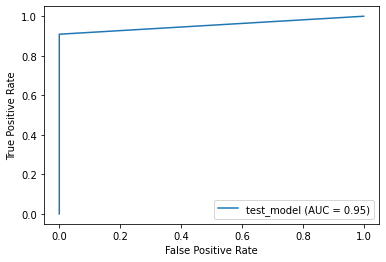

In [41]:
#@markdown ####**Model Socre: In Train Data Set**

model_naming = "test_model" #@param{type: 'string'}


predition = clf_model.predict(df_x_mod_trans)

accu_score = accuracy_score(predition, y_trans)
print("     ")
print("**********")
print("Accurary Score: ", accu_score)

auc_score = roc_auc_score(y_trans, predition)
fpr, tpr, thresholds = metrics.roc_curve(y_trans, predition, pos_label=1)
print("     ")
print("**********")
print("AUC: ", auc_score)
print("Thresholds: ")
print(thresholds)
print("FPR: ")
print(fpr)
print("TPR: ")
print(tpr)
print("     ")
# yhat2 = model.predict(df_reg_train_2)
# print(result.summary())
# RocCurveDisplay.from_estimator()

factor_importance_model = ['DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']
if model_selection in factor_importance_model:
# if model_selection == 'DecisionTreeClassifier' or model_selection == 'RandomForestClassifier' or model_selection == 'XGBClassifier':
  factor_importance = pd.Series(clf_model.feature_importances_, index=x_var_list).sort_values(ascending=False)
  print("     ")
  print("**********")
  print(factor_importance)
  print("     ")


roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_naming)
display.plot()
print("     ")
print("**********")
plt.show()

# print("     ")
# print("**********")
# print("Model Parameter")
# clf_model.get_params(deep=True)

In [29]:
import joblib

filename = 'xgboost_trial' #@param{type: 'string'}

save_file = filename+".sav"
download_model = True #@param {type:"boolean"}
joblib.dump(clf_model, save_file)

if download_model == True:
  files.download(save_file)

print(datetime.datetime.now())
print("Done!!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2022-11-12 02:33:03.925794
Done!!


In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV
#x_train, y_train, x_valid, y_valid, x_test, y_test =  # load datasets
clf = xgb.XGBClassifier()
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}
fit_params = {#'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [test],
              'verbose': 0}
rs = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=True, random_state=42)
rs.fit(*train, **fit_params)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# build a classifier
clf = RandomForestClassifier(n_estimators=100)
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 20
rs = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
rs.fit(*train)